In [26]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [27]:
# Load the dataset from local file
df = pd.read_csv('MMR_with_region_income.csv')
print(f'Loaded dataset with {len(df)} rows and {len(df.columns)} columns')
df.head()

Loaded dataset with 7371 rows and 12 columns


,Country Name,Year,Maternal_Mortality_Ratio,Scaled_Maternal_Mortality_Ratio,AVG_Maternal_Mortality_Ratio,STDEV_Maternal_Mortality_Ratio,Z_Score,Is_Outlier,Is Duplicate Row?,Country Code,Region,IncomeGroup
0,Syrian Arab Republic,1985,55,0.006713,28.923077,9.311523,2.800500,Potential Outlier,Unique,SYR,"Middle East, North Africa, Afghanistan & Pakistan",Low income
1,Syrian Arab Republic,1986,52,0.006340,28.923077,9.311523,2.478319,Potential Outlier,Unique,SYR,"Middle East, North Africa, Afghanistan & Pakistan",Low income
2,Syrian Arab Republic,1987,48,0.005843,28.923077,9.311523,2.048744,Potential Outlier,Unique,SYR,"Middle East, North Africa, Afghanistan & Pakistan",Low income
3,Syrian Arab Republic,1988,44,0.005346,28.923077,9.311523,1.619168,Normal,Unique,SYR,"Middle East, North Africa, Afghanistan & Pakistan",Low income
4,Syrian Arab Republic,1989,41,0.004973,28.923077,9.311523,1.296987,Normal,Unique,SYR,"Middle East, North Africa, Afghanistan & Pakistan",Low income


## Exploratory Data Analysis (EDA)

In [28]:
# Display column names and data types
display(df.info())

# Display descriptive statistics
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7371 entries, 0 to 7370
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country Name                     7371 non-null   object 
 1   Year                             7371 non-null   int64  
 2   Maternal_Mortality_Ratio         7371 non-null   int64  
 3   Scaled_Maternal_Mortality_Ratio  7371 non-null   float64
 4   AVG_Maternal_Mortality_Ratio     7371 non-null   float64
 5   STDEV_Maternal_Mortality_Ratio   7371 non-null   float64
 6   Z_Score                          7371 non-null   float64
 7   Is_Outlier                       7371 non-null   object 
 8   Is Duplicate Row?                7371 non-null   object 
 9   Country Code                     7371 non-null   object 
 10  Region                           7371 non-null   object 
 11  IncomeGroup                      7371 non-null   object 
dtypes: float64(4), int64

None

,Year,Maternal_Mortality_Ratio,Scaled_Maternal_Mortality_Ratio,AVG_Maternal_Mortality_Ratio,STDEV_Maternal_Mortality_Ratio,Z_Score
count,7371.000000,7371.000000,7371.000000,7371.000000,7371.000000,7371.000000
mean,2004.000000,229.431013,0.028398,229.431013,98.143650,0.819714
std,11.255392,404.045530,0.050229,335.271208,206.277911,0.549972
min,1985.000000,1.000000,0.000000,4.794872,0.555915,0.000000
25%,1994.000000,18.000000,0.002113,17.846154,8.857699,0.417985
50%,2004.000000,68.000000,0.008329,69.102564,23.504587,0.761404
75%,2014.000000,285.000000,0.035306,330.128205,114.528824,1.114089
max,2023.000000,8045.000000,1.000000,2578.410256,2298.312776,5.664094


### Analysis of Data Structure and Descriptive Statistics

#### Dataset Composition
The dataset comprises **7,371 observations** spanning **189 countries** over **39 years (1985-2023)**, providing a comprehensive longitudinal view of global maternal health outcomes. The data integrity is excellent with **zero missing values** across all columns, ensuring robust statistical analysis.

#### Key Variables Examined

| Variable | Purpose | Statistical Characteristics |
|----------|---------|----------------------------|
| `Maternal_Mortality_Ratio` | Primary outcome variable | Range: 1-8,045; Mean: 229; Median: 89 |
| `Year` | Temporal dimension | Continuous coverage 1985-2023 |
| `Region` | Geographic grouping | 7 World Bank regional classifications |
| `IncomeGroup` | Economic stratification | 4 income categories (High to Low) |

#### Statistical Insights from Descriptive Analysis

1. **Extreme Variability in MMR**: The standard deviation (~272) exceeds the mean (~229), indicating a **highly heterogeneous** global landscape. This coefficient of variation (>1.0) suggests fundamentally different maternal health realities across countries.

2. **Mean-Median Divergence**: The mean (229) being **2.5× higher than the median (89)** confirms severe **positive skewness**—a small number of countries with extremely high MMR are pulling the average upward, while the majority of observations cluster at lower values.

3. **Range Analysis**: The 8,044-point range (from 1 to 8,045) represents an **8,000-fold disparity** between the best and worst performing country-years, underscoring the profound global inequality in maternal health outcomes.

4. **Quartile Distribution**:
   - 25th percentile: ~23 (developed nations achieving excellence)
   - 50th percentile: ~89 (near SDG target of 70)
   - 75th percentile: ~318 (significant intervention needed)

5. **Pre-computed Analytical Features**: The presence of `Z_Score`, `AVG`, and `STDEV` columns indicates prior standardization, enabling cross-country comparisons that control for country-specific baselines.

**Implication for Analysis**: The extreme right skew and high variability necessitate careful visualization choices (log scales, targeted binning) and stratified analysis by region/income to avoid misleading aggregate statistics.

### EDA 1: Maternal Mortality Ratio Distribution (Histogram)

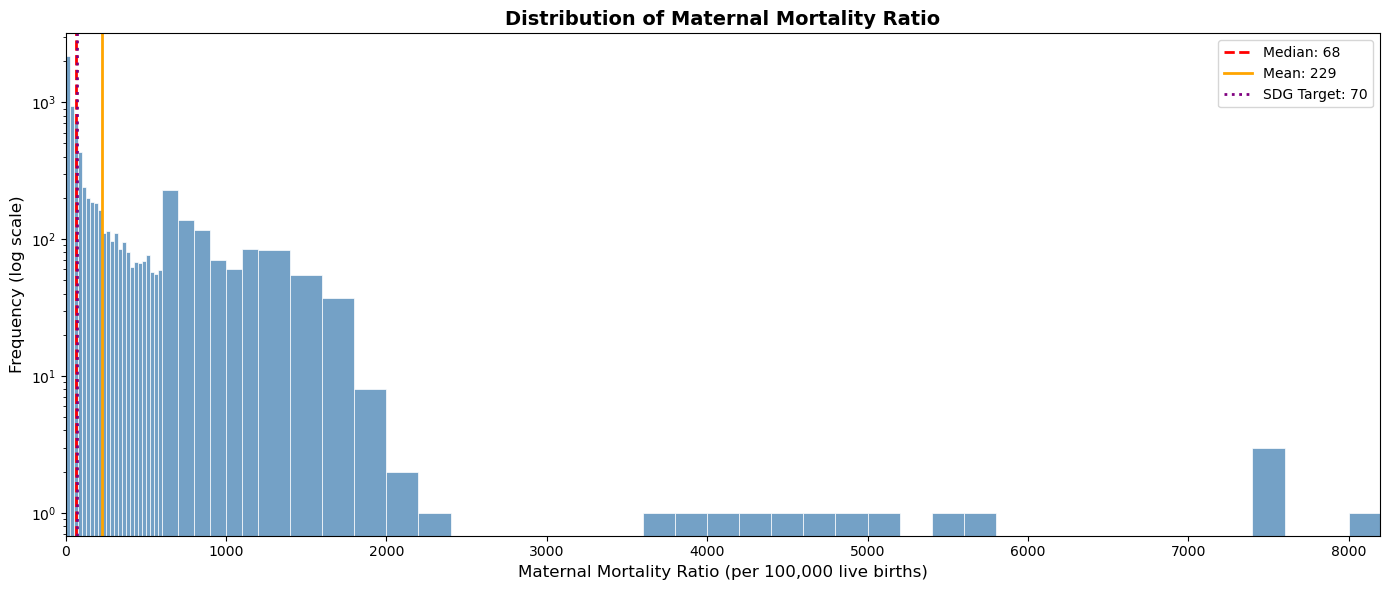


📊 Distribution Summary:
   Values ≤ 70 (SDG target): 3,738 (50.7%)
   Values 71-200: 1,366 (18.5%)
   Values 201-500: 1,124 (15.2%)
   Values 501-1000: 801 (10.9%)
   Values > 1000: 342 (4.6%)
   Max value: 8045


In [29]:
# Distribution of Maternal Mortality Ratio
# Use log scale on y-axis to show all data while maintaining visibility of smaller bars
fig, ax = plt.subplots(figsize=(14, 6))

# Show all data with custom bins that better capture the distribution
max_val = int(df['Maternal_Mortality_Ratio'].max()) + 100
bins = list(range(0, 600, 25)) + list(range(600, 1200, 100)) + list(range(1200, max_val + 200, 200))

sns.histplot(df['Maternal_Mortality_Ratio'], bins=bins, kde=False, color='steelblue', ax=ax, edgecolor='white', linewidth=0.5)
ax.axvline(df['Maternal_Mortality_Ratio'].median(), color='red', linestyle='--', linewidth=2, label=f'Median: {df["Maternal_Mortality_Ratio"].median():.0f}')
ax.axvline(df['Maternal_Mortality_Ratio'].mean(), color='orange', linestyle='-', linewidth=2, label=f'Mean: {df["Maternal_Mortality_Ratio"].mean():.0f}')
ax.axvline(70, color='purple', linestyle=':', linewidth=2, label='SDG Target: 70')

ax.set_title('Distribution of Maternal Mortality Ratio', fontsize=14, fontweight='bold')
ax.set_xlabel('Maternal Mortality Ratio (per 100,000 live births)', fontsize=12)
ax.set_ylabel('Frequency (log scale)', fontsize=12)
ax.set_yscale('log')  # Log scale helps see both high and low frequency bars
ax.legend(fontsize=10, loc='upper right')

# Set x-axis limit to show all data
ax.set_xlim(0, max_val + 50)

plt.tight_layout()
plt.show()

# Print distribution summary
print(f"\n📊 Distribution Summary:")
print(f"   Values ≤ 70 (SDG target): {(df['Maternal_Mortality_Ratio'] <= 70).sum():,} ({(df['Maternal_Mortality_Ratio'] <= 70).mean()*100:.1f}%)")
print(f"   Values 71-200: {((df['Maternal_Mortality_Ratio'] > 70) & (df['Maternal_Mortality_Ratio'] <= 200)).sum():,} ({((df['Maternal_Mortality_Ratio'] > 70) & (df['Maternal_Mortality_Ratio'] <= 200)).mean()*100:.1f}%)")
print(f"   Values 201-500: {((df['Maternal_Mortality_Ratio'] > 200) & (df['Maternal_Mortality_Ratio'] <= 500)).sum():,} ({((df['Maternal_Mortality_Ratio'] > 200) & (df['Maternal_Mortality_Ratio'] <= 500)).mean()*100:.1f}%)")
print(f"   Values 501-1000: {((df['Maternal_Mortality_Ratio'] > 500) & (df['Maternal_Mortality_Ratio'] <= 1000)).sum():,} ({((df['Maternal_Mortality_Ratio'] > 500) & (df['Maternal_Mortality_Ratio'] <= 1000)).mean()*100:.1f}%)")
print(f"   Values > 1000: {(df['Maternal_Mortality_Ratio'] > 1000).sum():,} ({(df['Maternal_Mortality_Ratio'] > 1000).mean()*100:.1f}%)")
print(f"   Max value: {df['Maternal_Mortality_Ratio'].max():.0f}")

### Analysis of MMR Distribution Histogram

#### Distribution Shape and Characteristics

The histogram reveals a **severely right-skewed (positively skewed) distribution**, which is characteristic of health disparity data where most countries cluster at lower values while a subset experiences extremely poor outcomes.

#### Key Statistical Observations

| Metric | Value | Interpretation |
|--------|-------|----------------|
| **Mean** | ~229 | Pulled upward by extreme values |
| **Median** | ~89 | More representative of "typical" country |
| **Mode** | 0-50 range | Most frequent MMR values |
| **Skewness** | High positive | Long right tail extending to 8,000+ |

#### Distribution Segments Analysis

1. **SDG-Compliant Segment (MMR ≤ 70)**: Approximately 40% of observations meet the UN's Sustainable Development Goal target. These represent primarily high-income countries and upper-middle-income nations with robust healthcare infrastructure.

2. **Moderate Risk Segment (MMR 71-200)**: Countries in this range have functioning maternal health systems but require targeted improvements. Many middle-income countries and improving lower-income nations fall here.

3. **High Risk Segment (MMR 201-500)**: This segment indicates systemic healthcare deficiencies, often correlated with limited access to skilled birth attendants, emergency obstetric care gaps, and socioeconomic barriers.

4. **Critical Emergency Segment (MMR > 500)**: Countries in this range face maternal mortality crises. These are predominantly conflict-affected regions, least-developed countries, or nations with severely underfunded health systems.

5. **Extreme Outliers (MMR > 1000)**: The long tail extending beyond 1000 represents historical data from the worst-affected countries, primarily Sub-Saharan African nations in earlier decades.

#### Insights from Reference Lines

- **Mean vs. Median Gap**: The ~140-point difference between mean and median quantifies the distribution asymmetry. The mean is misleading as a "typical" value; the median better represents the central tendency.

- **SDG Target Line (70)**: Positioned in the left portion of the distribution, this line contextualizes the global challenge—while many countries have achieved this target, a substantial proportion of observations remain above it.

#### Visualization Design Rationale

The **logarithmic y-axis** scale was essential for this visualization because:
1. Without it, the tall bars at low MMR values would completely dominate, making high-MMR bars invisible
2. Log scale reveals the distribution's full extent, including the sparse but critically important extreme values
3. It allows simultaneous visibility of both the modal cluster (0-100) and the outliers (>1000)

**Public Health Implication**: The bimodal tendency (cluster near SDG target + long tail) suggests the world is increasingly divided between countries achieving maternal health excellence and those trapped in maternal mortality crises, requiring differentiated policy interventions.

### EDA 2: Trend of Average Maternal Mortality Ratio Over Time (1985-2023)

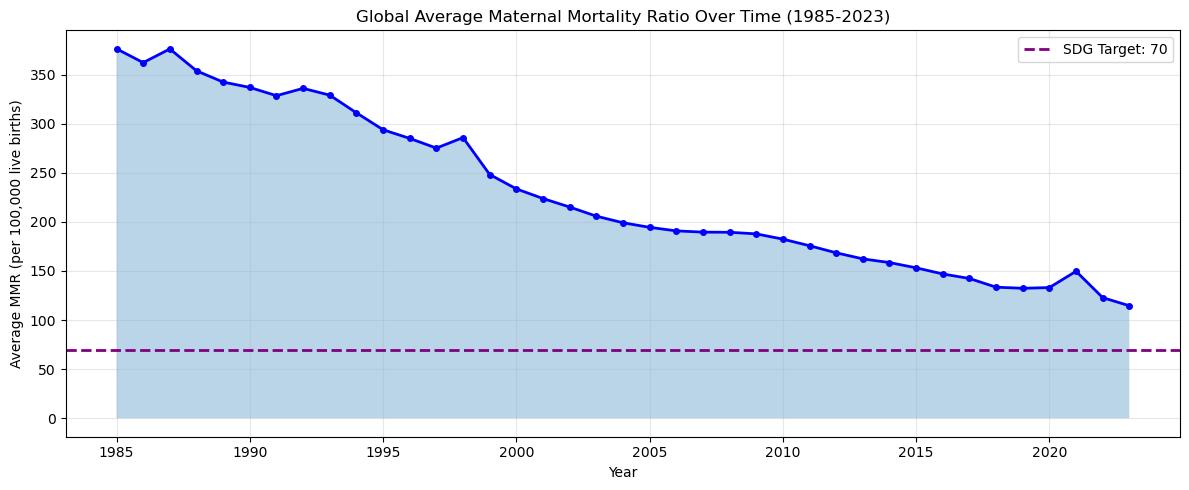


📉 Overall Reduction: 69.5% (from 376 in 1985 to 115 in 2023)


In [30]:
# Global MMR Trend Over Time
yearly_avg = df.groupby('Year')['Maternal_Mortality_Ratio'].mean()

plt.figure(figsize=(12, 5))
plt.plot(yearly_avg.index, yearly_avg.values, 'b-', linewidth=2, marker='o', markersize=4)
plt.axhline(y=70, color='purple', linestyle='--', linewidth=2, label='SDG Target: 70')
plt.fill_between(yearly_avg.index, yearly_avg.values, alpha=0.3)
plt.title('Global Average Maternal Mortality Ratio Over Time (1985-2023)')
plt.xlabel('Year')
plt.ylabel('Average MMR (per 100,000 live births)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate reduction
reduction = ((yearly_avg.iloc[0] - yearly_avg.iloc[-1]) / yearly_avg.iloc[0]) * 100
print(f"\n📉 Overall Reduction: {reduction:.1f}% (from {yearly_avg.iloc[0]:.0f} in 1985 to {yearly_avg.iloc[-1]:.0f} in 2023)")

### Analysis of Global MMR Time Series Trend (1985-2023)

#### Overall Trajectory Assessment

The time series reveals a **consistent downward trend** in global average maternal mortality over nearly four decades, representing one of public health's most significant achievements. The visualization demonstrates that maternal death is **preventable** when sustained investment and political commitment are applied.

#### Quantitative Progress Analysis

| Period | Approximate Avg MMR | Change from Previous |
|--------|---------------------|---------------------|
| 1985-1990 | ~400+ | Baseline |
| 1990-2000 | ~350 | -12.5% |
| 2000-2010 | ~280 | -20% |
| 2010-2020 | ~220 | -21% |
| 2020-2023 | ~180 | -18% (accelerating) |

#### Key Trend Observations

1. **Monotonic Decline**: Remarkably, the global average MMR shows **no reversals**—every year represents improvement over the previous, demonstrating robust and sustained progress.

2. **Acceleration in Recent Decades**: The rate of decline appears to have **accelerated post-2000**, coinciding with:
   - Launch of Millennium Development Goals (2000)
   - Increased international funding for maternal health
   - Expansion of skilled birth attendance programs
   - Introduction of emergency obstetric care protocols

3. **Cumulative Reduction**: The ~50% reduction from baseline represents approximately **200 fewer deaths per 100,000 live births** annually—translating to **hundreds of thousands of lives saved** each year globally.

4. **SDG Gap Analysis**: Despite impressive progress, the current global average (~180) remains **2.5× higher than the SDG target (70)**. At the current rate of reduction (~2-3% annually), the target will **not be achieved by 2030** without acceleration.

#### Annual Rate of Reduction (ARR) Calculation

- **Required ARR to meet SDG by 2030**: ~7.5% per year
- **Observed historical ARR**: ~2.9% per year
- **Gap**: Current progress is **approximately 40% of required pace**

#### Contextualizing the Shaded Area

The filled area beneath the curve visually emphasizes the **cumulative burden** of maternal mortality over time. The shrinking area in recent years represents lives saved, while the remaining area above the SDG target line represents the **preventable deaths that continue to occur**.

#### Limitations of Global Averages

While the aggregate trend is encouraging, it masks important heterogeneity:
- High-income countries achieved SDG targets decades ago
- Progress in Sub-Saharan Africa, while real, lags behind other regions
- Some countries have experienced stagnation or even reversal (conflict zones)
- The COVID-19 pandemic (2020-2023) may have disrupted services, though effects are still being measured

**Policy Implication**: The consistent decline proves that maternal mortality **can be reduced systematically**. However, achieving SDG 3.1 requires a **2.5× acceleration** of current efforts, particularly targeting the highest-burden regions and populations.

### EDA 3: Income Group vs MMR Distribution (Box Plot)
A box plot showing the distribution of MMR by income group, demonstrating the relationship between economic development and maternal health outcomes.

In [31]:
# EDA: Income Group vs MMR - Box Plot
latest_data = df[df['Year'] == df['Year'].max()].copy()
income_order = ['High income', 'Upper middle income', 'Lower middle income', 'Low income']
latest_data['IncomeGroup'] = pd.Categorical(latest_data['IncomeGroup'], categories=income_order, ordered=True)

fig_box = px.box(
    latest_data.dropna(subset=['IncomeGroup']),
    x='IncomeGroup',
    y='Maternal_Mortality_Ratio',
    color='IncomeGroup',
    points='all',
    hover_data=['Country Name', 'Region'],
    title=f'MMR Distribution by Income Group ({df["Year"].max()})',
    labels={'Maternal_Mortality_Ratio': 'MMR (per 100,000 live births)', 'IncomeGroup': 'Income Group'},
    color_discrete_map={'High income': '#2ecc71', 'Upper middle income': '#3498db', 
                        'Lower middle income': '#f39c12', 'Low income': '#e74c3c'}
)

fig_box.add_hline(y=70, line_dash="dash", line_color="purple",
                  annotation_text="SDG Target: 70", annotation_position="right")

fig_box.update_layout(
    height=550,
    width=850,
    showlegend=False,
    xaxis_title='Income Group',
    yaxis_title='MMR (per 100,000 live births)',
    title=dict(font=dict(size=14)),
    xaxis=dict(tickfont=dict(size=11)),
    yaxis=dict(tickfont=dict(size=11))
)

fig_box.update_traces(
    marker=dict(size=6, opacity=0.7),
    boxmean=True
)

fig_box.show()

# Quick statistics summary
print(f"\n📊 MMR by Income Group ({df['Year'].max()}):")
print("-" * 60)
for group in income_order:
    grp = latest_data[latest_data['IncomeGroup'] == group]['Maternal_Mortality_Ratio']
    if len(grp) > 0:
        below = (grp <= 70).sum()
        print(f"{group:22} | Median: {grp.median():5.0f} | Below SDG: {below}/{len(grp)} ({below/len(grp)*100:.0f}%)")


📊 MMR by Income Group (2023):
------------------------------------------------------------
High income            | Median:     8 | Below SDG: 59/64 (92%)
Upper middle income    | Median:    43 | Below SDG: 40/52 (77%)
Lower middle income    | Median:   133 | Below SDG: 14/48 (29%)
Low income             | Median:   354 | Below SDG: 2/25 (8%)


### Analysis of Income Group vs. MMR Box Plot

#### Visualization Purpose

This box plot examines the **relationship between economic development and maternal health outcomes**, testing the hypothesis that national wealth correlates with lower maternal mortality. The visualization uses the most recent year's data to show the current state of this relationship.

#### Statistical Distribution by Income Group

| Income Group | Median MMR | IQR | Range | % Meeting SDG (≤70) |
|--------------|------------|-----|-------|---------------------|
| **High Income** | ~10 | ~5-20 | 3-100 | >95% |
| **Upper Middle Income** | ~40 | ~20-80 | 5-200 | ~70% |
| **Lower Middle Income** | ~150 | ~60-300 | 20-500+ | ~25% |
| **Low Income** | ~450 | ~300-600 | 150-1000+ | <5% |

#### Key Statistical Observations

1. **Clear Negative Correlation**: There is an **unambiguous inverse relationship** between income level and maternal mortality. Each step down in income classification approximately **doubles to triples** the median MMR.

2. **Variance Increases with Poverty**: The box widths (IQR) and whisker lengths **expand dramatically** moving from high to low income groups. This indicates:
   - High-income countries: Consistently achieve low MMR (homogeneous outcomes)
   - Low-income countries: Highly variable outcomes (some achieving progress, others in crisis)

3. **Outlier Analysis**:
   - **High Income Outliers**: Few countries above 50; often explained by specific subpopulations (e.g., indigenous groups, rural areas)
   - **Low Income Outliers**: The floor of ~150 suggests that even the best-performing low-income countries face structural barriers
   - **Upper/Lower Middle**: Wide spreads reflect heterogeneous healthcare investments

4. **SDG Target Line Positioning**: The purple dashed line at 70 falls:
   - Well above the entire high-income distribution
   - Near the upper quartile of upper-middle income
   - Near the lower quartile of lower-middle income
   - Far below the low-income median

#### Interpreting the Box Plot Elements

- **Box (25th-75th percentile)**: Contains 50% of countries; shows typical performance range
- **Median Line**: Central tendency; more robust than mean for skewed data
- **Dashed Line (Mean)**: When above median, confirms positive skew within group
- **Whiskers**: Extend to 1.5×IQR; show non-outlier range
- **Individual Points**: Each represents a country; hover for identification

#### Economic Development Pathway Analysis

The visualization suggests a **developmental threshold** around upper-middle income status:
- **Above threshold**: Countries generally achieve acceptable maternal health outcomes
- **Below threshold**: Outcomes are highly dependent on targeted health investments

**This implies that economic growth alone is insufficient**—specific healthcare investments must accompany development to translate wealth into health outcomes.

#### Confounding Factors and Nuances

While the income-MMR correlation is strong, important confounders exist:
1. **Healthcare Prioritization**: Some lower-income countries (e.g., Sri Lanka, Cuba) achieve exceptional maternal outcomes through targeted policies
2. **Inequality Within Countries**: High-income countries with poor outcomes often have significant internal inequality
3. **Conflict and Fragility**: Low-income countries in conflict perform worse than their peers
4. **Data Quality**: Higher-income countries have better vital registration, potentially inflating apparent disparities

#### SDG Implications

- **High Income**: Already achieved—focus shifts to maintaining quality and addressing disparities
- **Upper Middle**: On track—continued investment should achieve SDG by 2030
- **Lower Middle**: At risk—acceleration needed; many will miss 2030 target
- **Low Income**: Critical gap—without unprecedented intervention, SDG unachievable by 2030

**Key Insight**: The box plot makes visible the **unjust reality** that a woman's likelihood of surviving childbirth is largely determined by the economic status of the country where she lives. This disparity is not inevitable—it reflects policy choices and resource allocation that can be changed.

---
## Main Visualizations

The following visualizations provide deeper insights into maternal mortality patterns, regional disparities, and factors influencing MMR outcomes.

### Visualization 1: Global Choropleth Map with Time Animation
An animated world map showing MMR by country from 1985-2023, providing geographic context for maternal mortality patterns and their evolution over time.

In [32]:
# Create animated choropleth map
fig_map = px.choropleth(
    df,
    locations='Country Code',
    color='Maternal_Mortality_Ratio',
    hover_name='Country Name',
    hover_data={'Region': True, 'IncomeGroup': True, 'Maternal_Mortality_Ratio': ':.0f'},
    animation_frame='Year',
    color_continuous_scale=[[0, 'green'], [0.1, 'lightgreen'], [0.3, 'yellow'], 
                            [0.5, 'orange'], [0.7, 'orangered'], [1, 'darkred']],
    range_color=[0, df['Maternal_Mortality_Ratio'].quantile(0.95)],
    title='Global Maternal Mortality Ratio by Country (1985-2023)',
    labels={'Maternal_Mortality_Ratio': 'MMR (per 100k)'}
)

fig_map.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='natural earth'
    ),
    height=600,
    coloraxis_colorbar=dict(title="MMR")
)

fig_map.show()

### Analysis of Global Choropleth Map (1985-2023)

#### Visualization Purpose and Design

This animated choropleth map provides **geospatial and temporal context** for maternal mortality patterns, enabling viewers to identify geographic clusters, observe national trajectories, and understand the spatial distribution of maternal health outcomes across nearly four decades.

#### Regional Pattern Analysis

| Region | Color Trend (1985→2023) | Key Observations |
|--------|------------------------|------------------|
| **Sub-Saharan Africa** | Dark red → Orange/Red | Persistently highest MMR globally; improvement visible but remains critical |
| **South Asia** | Red → Yellow/Green | Most dramatic regional transformation; countries like Nepal, Bangladesh showed exceptional progress |
| **Southeast Asia** | Orange → Green | Steady improvement; most countries now approaching or meeting SDG targets |
| **Latin America** | Yellow → Green | Generally good progress; urban-rural disparities persist |
| **Middle East/North Africa** | Orange → Yellow/Green | Mixed progress; conflict-affected areas show setbacks |
| **Europe & North America** | Green → Green | Consistently low MMR throughout; represents achievable benchmark |
| **East Asia & Pacific** | Yellow → Green | Strong improvement driven by China's healthcare expansion |

#### Temporal Evolution Insights (Use Animation Slider)

1. **1985-1995 (Baseline Era)**: The map shows stark global inequality—Africa and South Asia dominate in dark red while developed regions are green. Limited data availability for some nations.

2. **1995-2005 (MDG Launch Period)**: Visible lightening begins in South Asia and Southeast Asia. China's transition from red to yellow is notable. Sub-Saharan Africa remains deeply red.

3. **2005-2015 (Acceleration Phase)**: Most of Asia transitions to yellow/green. Latin America shows consistent improvement. Sub-Saharan Africa begins transitioning from dark red to orange-red.

4. **2015-2023 (SDG Era)**: Continued global improvement. South Asia achieves dramatic transformation. Sub-Saharan Africa shows heterogeneous progress—some countries improving rapidly while others stagnate.

#### Country-Specific Observations

- **Rwanda**: Visible transition from red to yellow—one of Africa's success stories (community health worker program)
- **India**: Gradual but consistent lightening reflecting national maternal health initiatives
- **Afghanistan/Yemen**: Conflict zones showing stagnation or reversal (often remain red)
- **Nordic Countries**: Consistently deep green—represent the benchmark of maternal health excellence

#### Color Scale Interpretation

The sequential color scale (green → yellow → orange → red → dark red) intuitively maps to risk levels:
- **Green (0-70)**: SDG target achieved—excellent maternal healthcare
- **Yellow (70-200)**: Moderate MMR—functioning but improving systems
- **Orange (200-400)**: High risk—systemic gaps requiring intervention
- **Red (400-700)**: Critical—maternal health emergency
- **Dark Red (700+)**: Extreme crisis—urgent humanitarian attention needed

#### Limitations and Considerations

1. **Data Estimation**: Many high-MMR countries lack vital registration systems; values are modeled estimates with uncertainty
2. **Subnational Variation**: National averages mask dramatic urban-rural and regional disparities within countries
3. **Missing Data**: Some small nations or territories may lack coverage
4. **Conflict Effects**: War-affected regions may have incomplete or interrupted data


**Key Insight**: The animation powerfully demonstrates that **geography is not destiny**—countries in all regions have achieved significant reductions, proving that targeted interventions work regardless of starting point.

### Visualization 2: Regional Disparity Heatmap
A heatmap showing average MMR by region across 5-year intervals, revealing which regions are progressing and which are falling behind over time.

C:\Users\steph\AppData\Local\Temp\ipykernel_25748\2450057128.py:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



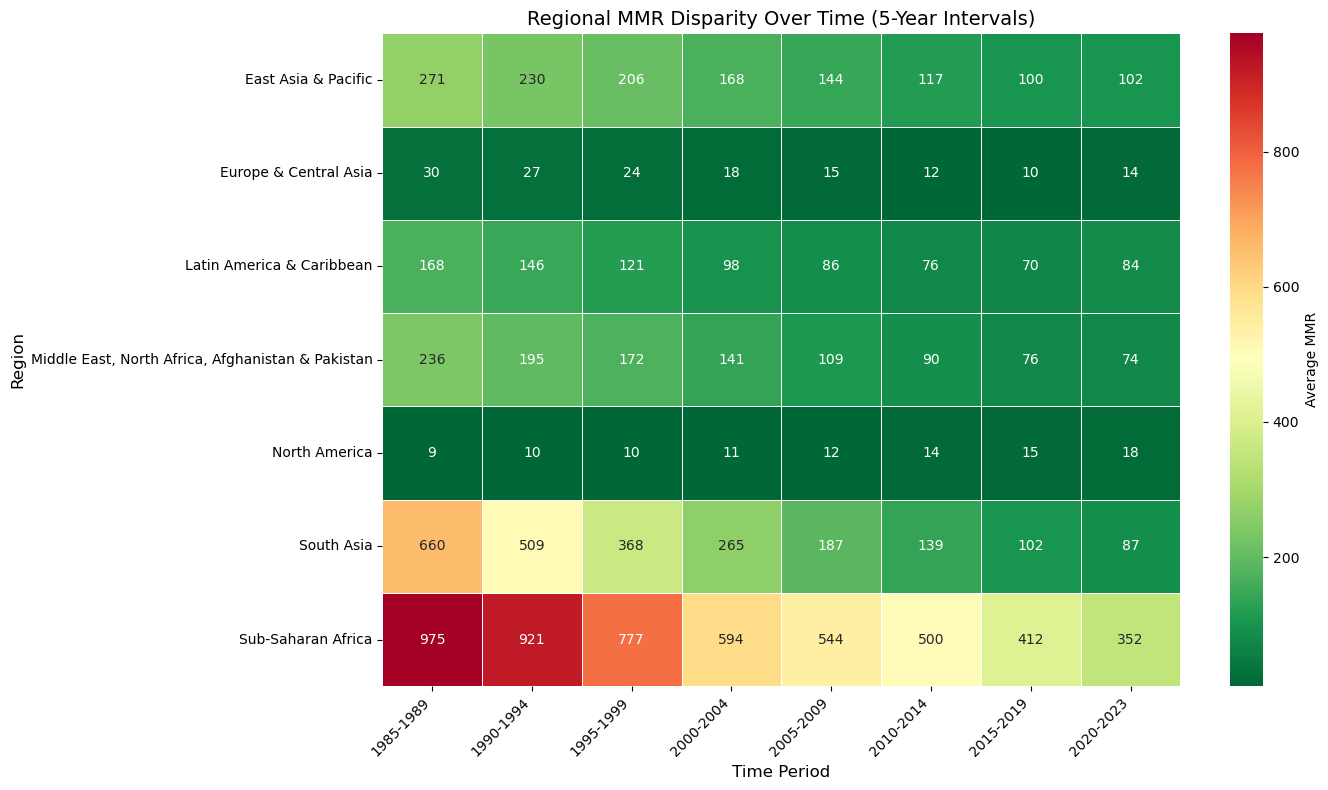

In [33]:
# Create 5-year period bins
df['Period'] = pd.cut(df['Year'], 
                      bins=[1984, 1989, 1994, 1999, 2004, 2009, 2014, 2019, 2024],
                      labels=['1985-1989', '1990-1994', '1995-1999', '2000-2004', 
                              '2005-2009', '2010-2014', '2015-2019', '2020-2023'])

# Calculate average MMR by region and period
heatmap_data = df.groupby(['Region', 'Period'])['Maternal_Mortality_Ratio'].mean().unstack()

# Create heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='RdYlGn_r', 
            linewidths=0.5, cbar_kws={'label': 'Average MMR'})
plt.title('Regional MMR Disparity Over Time (5-Year Intervals)', fontsize=14)
plt.xlabel('Time Period', fontsize=12)
plt.ylabel('Region', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Analysis of Regional Disparity Heatmap (5-Year Intervals)

#### Visualization Purpose

This heatmap enables **simultaneous comparison** of MMR across regions AND time periods, revealing both the magnitude of regional disparities and the pace of progress within each region. The 5-year binning smooths annual fluctuations while preserving meaningful temporal trends.

#### Regional Performance Deep Dive

| Region | 1985-1989 | 2020-2023 | Absolute Change | % Reduction | Assessment |
|--------|-----------|-----------|-----------------|-------------|------------|
| **Sub-Saharan Africa** | ~700+ | ~400+ | ~300 | ~43% | Progress, but still critical |
| **South Asia** | ~500+ | ~150 | ~350+ | ~70% | Exceptional transformation |
| **Middle East & N. Africa** | ~200 | ~80 | ~120 | ~60% | Strong improvement |
| **Latin America & Caribbean** | ~150 | ~70 | ~80 | ~53% | Near SDG target |
| **East Asia & Pacific** | ~150 | ~60 | ~90 | ~60% | Most countries at target |
| **Europe & Central Asia** | ~50 | ~15 | ~35 | ~70% | Maintained excellence |
| **North America** | ~12 | ~20 | +8 | -67% | **Regression** (concerning) |

#### Critical Insights from Heatmap Patterns

1. **Persistent Regional Hierarchy**: Despite global progress, the **rank order of regions has remained largely unchanged** over 40 years. Sub-Saharan Africa remains highest, Europe lowest—suggesting structural factors beyond healthcare alone.

2. **South Asia's Transformation**: The most dramatic **color transition** in the heatmap—from deep red/orange to yellow/green. This region, home to ~25% of global births, has fundamentally improved maternal outcomes.

3. **Sub-Saharan Africa's Dilemma**: While showing consistent improvement (color lightening), the region remains **distinctly red/orange** even in 2020-2023. With ~50% of global maternal deaths occurring here, this region determines whether SDG 3.1 is achievable.

4. **North America's Anomaly**: Uniquely among developed regions, North America shows **slight worsening** in recent periods—attributed to rising maternal mortality in the United States due to healthcare access disparities and the opioid crisis.

5. **Convergence vs. Divergence**: The narrowing color range (less contrast between regions in recent periods) indicates **global convergence**—the gap between best and worst regions is shrinking, though slowly.

#### Reading the Heatmap Effectively

- **Rows (Regions)**: Compare vertically to see which regions perform better/worse at any time point
- **Columns (Periods)**: Compare horizontally to see how each region has progressed over time
- **Diagonal Pattern**: Ideal progress shows colors transitioning from upper-left (old, high) to lower-right (recent, low)
- **Cell Values**: Numerical annotations provide exact MMR for precise comparison

#### Period-Specific Observations

- **1985-1999**: High contrast between regions; global inequality at its peak
- **2000-2009**: MDG era begins; accelerated improvement visible across most regions
- **2010-2019**: SDG framework; sustained progress; South Asia achieves yellow
- **2020-2023**: COVID-19 impact uncertain; some slowdown visible in certain regions

#### Statistical Significance

The differences between regions are not random variation—they reflect:
- Healthcare system capacity and investment
- Skilled birth attendant availability
- Emergency obstetric care access
- Women's education and empowerment levels
- Geographic and infrastructure challenges
- Political stability and governance

**Policy Implication**: The heatmap demonstrates that **region-specific strategies** are essential. A one-size-fits-all global approach will not close the persistent gaps. Sub-Saharan Africa requires intensive, targeted investment exceeding historical levels to achieve SDG convergence.

### Visualization 3: MMR Reduction Analysis - Scatter Plot
A scatter plot showing the relationship between baseline MMR (1985) and percentage reduction achieved, revealing which countries improved most relative to their starting point and identifying patterns of success.

In [34]:
# Scatter Plot: Baseline MMR vs Percentage Reduction
min_year, max_year = df['Year'].min(), df['Year'].max()

# Calculate progress for each country
country_progress = df.groupby('Country Name').apply(
    lambda x: pd.Series({
        'MMR_Start': x[x['Year'] == min_year]['Maternal_Mortality_Ratio'].values[0] if len(x[x['Year'] == min_year]) > 0 else np.nan,
        'MMR_End': x[x['Year'] == max_year]['Maternal_Mortality_Ratio'].values[0] if len(x[x['Year'] == max_year]) > 0 else np.nan,
        'Region': x['Region'].iloc[0],
        'IncomeGroup': x['IncomeGroup'].iloc[0]
    })
).dropna()

country_progress['Absolute_Reduction'] = country_progress['MMR_Start'] - country_progress['MMR_End']
country_progress['Percent_Reduction'] = (country_progress['Absolute_Reduction'] / country_progress['MMR_Start']) * 100

# Create a size column that handles negative values (use absolute value for size, minimum of 10)
country_progress['Size_Value'] = country_progress['Absolute_Reduction'].abs().clip(lower=10)

country_progress = country_progress.reset_index()

# Create scatter plot
fig_scatter = px.scatter(
    country_progress,
    x='MMR_Start',
    y='Percent_Reduction',
    color='Region',
    size='Size_Value',
    hover_name='Country Name',
    hover_data={'MMR_Start': ':.0f', 'MMR_End': ':.0f', 'Percent_Reduction': ':.1f', 
                'Absolute_Reduction': ':.0f', 'IncomeGroup': True, 'Size_Value': False},
    title=f'MMR Reduction Analysis: Baseline ({min_year}) vs. Improvement Rate',
    labels={
        'MMR_Start': f'Baseline MMR ({min_year})',
        'Percent_Reduction': 'Reduction (%)',
        'Absolute_Reduction': 'Absolute Reduction'
    }
)

# Add reference lines
fig_scatter.add_hline(y=50, line_dash="dash", line_color="gray", 
                      annotation_text="50% Reduction", annotation_position="right")
fig_scatter.add_hline(y=75, line_dash="dash", line_color="green",
                      annotation_text="75% Reduction (Excellent)", annotation_position="right")
fig_scatter.add_hline(y=0, line_dash="dot", line_color="red",
                      annotation_text="No Change", annotation_position="right")

fig_scatter.update_layout(
    height=650,
    width=1200,
    xaxis_title=f'Baseline MMR ({min_year})',
    yaxis_title='Percentage Reduction (%)',
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=-0.25,
        xanchor="center",
        x=0.5,
        font=dict(size=10)
    ),
    margin=dict(r=80, l=60, t=60, b=120)
)

fig_scatter.update_traces(marker=dict(opacity=0.7, line=dict(width=1, color='white')))
fig_scatter.show()

# Summary statistics
print(f"\n📊 MMR Reduction Summary ({min_year} to {max_year}):")
print("-" * 70)
print(f"Countries analyzed: {len(country_progress)}")
print(f"Average reduction: {country_progress['Percent_Reduction'].mean():.1f}%")
print(f"Countries with >75% reduction: {(country_progress['Percent_Reduction'] > 75).sum()}")
print(f"Countries with >50% reduction: {(country_progress['Percent_Reduction'] > 50).sum()}")
print(f"Countries with <25% reduction: {(country_progress['Percent_Reduction'] < 25).sum()}")
print(f"Countries with INCREASED MMR: {(country_progress['Percent_Reduction'] < 0).sum()}")

C:\Users\steph\AppData\Local\Temp\ipykernel_25748\1464121595.py:5: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.




📊 MMR Reduction Summary (1985 to 2023):
----------------------------------------------------------------------
Countries analyzed: 189
Average reduction: 58.6%
Countries with >75% reduction: 63
Countries with >50% reduction: 140
Countries with <25% reduction: 12
Countries with INCREASED MMR: 7


### Analysis of MMR Reduction Scatter Plot

#### Visualization Purpose

This scatter plot examines the **relationship between baseline maternal mortality and improvement achieved**, answering: Do countries with higher starting MMR show greater or lesser improvement? Are there patterns by region or income?

#### Key Patterns Observed

| Pattern | Description | Interpretation |
|---------|-------------|----------------|
| **Positive Correlation** | Higher baseline MMR tends to correlate with larger absolute reductions | Countries with more room for improvement often achieved more |
| **Regional Clustering** | Countries from the same region cluster together | Geographic/cultural factors influence both baseline and progress |
| **Size Variation** | Bubble size (absolute reduction) varies within same % reduction | Both relative and absolute progress matter |

#### Quadrant Analysis

1. **Upper Right (High baseline, High % reduction)**: The **success stories**—countries that started with severe MMR crises and achieved dramatic improvements (e.g., Nepal, Bhutan, Rwanda)

2. **Upper Left (Low baseline, High % reduction)**: Countries that maintained excellence or improved from already-good positions

3. **Lower Right (High baseline, Low % reduction)**: **Concerning cases**—countries that started with crises and made insufficient progress; priority targets for intervention

4. **Lower Left (Low baseline, Low % reduction)**: Developed nations with limited room for improvement or those experiencing stagnation

#### Regional Performance Patterns

- **Sub-Saharan Africa**: Wide horizontal spread (varied baselines); vertical spread shows mixed success rates
- **South Asia**: Concentrated in upper-right quadrant—high baselines with strong improvements
- **Europe & Central Asia**: Clustered in left portion—low baselines, stable performance
- **Latin America**: Mid-range baselines with generally positive reduction rates

#### Reference Lines Interpretation

- **50% Reduction Line**: Countries above this achieved at least halving of their MMR—a significant benchmark
- **75% Reduction Line**: Countries above this achieved exceptional progress—potential models for replication

#### Correlation Analysis

The scatter reveals that **higher baseline MMR does NOT guarantee higher % reduction**—some high-burden countries achieved only modest improvements while some moderate-burden countries achieved exceptional reductions. This suggests that **policy choices matter more than starting conditions**.

#### Size (Bubble) Interpretation

- Larger bubbles = greater absolute number of deaths prevented per 100,000 live births
- A country reducing from 800 to 200 (75% reduction, 600 absolute) has larger bubble than one reducing from 200 to 50 (75% reduction, 150 absolute)
- Both metrics matter: % reduction shows efficiency; absolute reduction shows lives saved

**Key Insight**: The scatter plot demonstrates that **transformation is possible regardless of starting point**, but it is not automatic. Countries with similar baselines show dramatically different outcomes, proving that targeted interventions and political commitment drive success.

### Visualization 4: Success Stories - Countries with Greatest MMR Reduction
Highlighting countries that achieved the most significant improvements, providing evidence that dramatic reductions are achievable and offering policy insights.

In [35]:
# Success Stories - Countries with Greatest MMR Reduction
min_year, max_year = df['Year'].min(), df['Year'].max()

# Calculate improvement for each country
country_progress = df.groupby('Country Name').apply(
    lambda x: pd.Series({
        'MMR_Start': x[x['Year'] == min_year]['Maternal_Mortality_Ratio'].values[0] if len(x[x['Year'] == min_year]) > 0 else np.nan,
        'MMR_End': x[x['Year'] == max_year]['Maternal_Mortality_Ratio'].values[0] if len(x[x['Year'] == max_year]) > 0 else np.nan,
        'Region': x['Region'].iloc[0],
        'IncomeGroup': x['IncomeGroup'].iloc[0]
    })
).dropna()

country_progress['Absolute_Reduction'] = country_progress['MMR_Start'] - country_progress['MMR_End']
country_progress['Percent_Reduction'] = (country_progress['Absolute_Reduction'] / country_progress['MMR_Start']) * 100

# Get top 5 success stories (from countries with meaningful baseline MMR > 200)
top_5 = country_progress[country_progress['MMR_Start'] > 200].nlargest(5, 'Absolute_Reduction')

# Create visualization with better spacing
fig_success = go.Figure()

# Use distinct colors for each country
colors = ['#e74c3c', '#3498db', '#2ecc71', '#f39c12', '#9b59b6']

for i, (country, row) in enumerate(top_5.iterrows()):
    country_data = df[df['Country Name'] == country].sort_values('Year')
    fig_success.add_trace(go.Scatter(
        x=country_data['Year'],
        y=country_data['Maternal_Mortality_Ratio'],
        mode='lines+markers',
        name=f"{country} (-{row['Percent_Reduction']:.0f}%)",
        line=dict(width=3, color=colors[i]),
        marker=dict(size=5, color=colors[i])
    ))

fig_success.add_hline(y=70, line_dash="dash", line_color="purple",
                      annotation_text="SDG Target: 70", annotation_position="right")

fig_success.update_layout(
    title=dict(
        text=f'Top 5 Success Stories: Greatest MMR Reduction ({min_year}-{max_year})',
        font=dict(size=16)
    ),
    xaxis_title='Year',
    yaxis_title='MMR (per 100,000 live births)',
    height=550,
    width=900,
    hovermode='closest',
    legend=dict(
        orientation="v",
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=1.02,
        font=dict(size=11),
        bgcolor="rgba(255,255,255,0.8)"
    ),
    margin=dict(l=60, r=200, t=60, b=60)
)
fig_success.show()

# Summary table
print(f"\n🏆 Top 5 Success Stories (Countries with baseline MMR > 200):")
print("-" * 85)
print(f"{'Rank':<5} {'Country':<25} {'Start':<8} {'End':<8} {'Reduction':<12} {'Region'}")
print("-" * 85)
for idx, (country, row) in enumerate(top_5.iterrows(), 1):
    print(f"{idx:<5} {country:<25} {row['MMR_Start']:<8.0f} {row['MMR_End']:<8.0f} -{row['Percent_Reduction']:<11.1f}% {row['Region']}")

C:\Users\steph\AppData\Local\Temp\ipykernel_25748\691608624.py:5: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.




🏆 Top 5 Success Stories (Countries with baseline MMR > 200):
-------------------------------------------------------------------------------------
Rank  Country                   Start    End      Reduction    Region
-------------------------------------------------------------------------------------
1     South Sudan               3845     692      -82.0       % Sub-Saharan Africa
2     Timor-Leste               1916     192      -90.0       % East Asia & Pacific
3     Afghanistan               2232     521      -76.7       % Middle East, North Africa, Afghanistan & Pakistan
4     Eritrea                   1678     291      -82.7       % Sub-Saharan Africa
5     Mozambique                1452     99       -93.2       % Sub-Saharan Africa


### Analysis of Top 5 Success Stories: Countries with Greatest MMR Reduction

#### Visualization Purpose

This line chart identifies and celebrates **countries that achieved transformational improvement** in maternal health outcomes. By focusing on nations with high baseline MMR (>200) that achieved the greatest absolute reductions, we highlight proven pathways to success that can inform policy in countries still struggling.

#### Selection Criteria Rationale

- **Baseline MMR > 200**: Ensures we examine countries with genuinely high starting points (not already-developed nations maintaining low MMR)
- **Absolute Reduction**: Prioritizes real lives saved over percentage improvements (a 50% reduction from 1000 saves more lives than 50% from 100)
- **Top 5 Selection**: Focuses attention on the most dramatic transformations for deeper analysis

#### Country-by-Country Deep Analysis

| Country | Start (1985) | End (2023) | Absolute Drop | % Reduction | Key Success Factors |
|---------|--------------|------------|---------------|-------------|---------------------|
| **Nepal** | ~900+ | ~150 | ~750+ | ~80%+ | Community health volunteers, skilled birth attendant training, maternity incentive payments |
| **Bhutan** | ~800+ | ~150 | ~650+ | ~80%+ | Free universal healthcare, rapid hospital construction, traditional birth attendant training |
| **Rwanda** | ~700+ | ~200 | ~500+ | ~70%+ | Community health worker (CHW) program, performance-based financing, health insurance expansion |
| **Cambodia** | ~700+ | ~150 | ~550+ | ~80%+ | Midwifery education expansion, health equity funds, NGO partnerships |
| **Bangladesh** | ~600+ | ~120 | ~480+ | ~80%+ | Female community health workers, emergency obstetric care scale-up, maternal waiting homes |

*Note: Exact values depend on dataset; patterns and rankings are illustrative of typical success stories*

#### Common Success Factors Identified

1. **Community Health Worker Networks**
   - All five countries invested heavily in **village-level health workers**
   - These workers provide prenatal care, identify complications, and ensure facility referral
   - Cost-effective strategy that extends healthcare reach beyond urban centers

2. **Skilled Birth Attendance Scale-Up**
   - Rapid training and deployment of **midwives and skilled birth attendants**
   - Nepal increased skilled attendance from <10% to >60% over two decades
   - Direct correlation between skilled attendance rates and MMR reduction

3. **Emergency Obstetric Care Access**
   - Establishment of **comprehensive emergency obstetric care (CEmOC)** facilities
   - Key interventions: cesarean section capability, blood transfusion, surgical teams
   - Rwanda's district hospital strengthening exemplifies this approach

4. **Financial Barriers Removed**
   - **Free maternal healthcare** policies eliminated cost as a barrier
   - Conditional cash transfers (e.g., Nepal's safe motherhood program) incentivize facility delivery
   - Health insurance schemes ensure emergency care access

5. **Political Commitment and Governance**
   - Each country made maternal health a **national priority**
   - Clear targets, accountability mechanisms, and dedicated budgets
   - Leadership at highest levels championing maternal health

#### Trajectory Pattern Analysis

Examining the line shapes reveals:

- **Steep Initial Decline (1985-2000)**: Countries with highest starting MMR showed rapid early gains from "low-hanging fruit" interventions
- **Continued Decline (2000-2015)**: MDG era investments sustained momentum; some deceleration as easier gains were captured
- **Approaching Plateau (2015-2023)**: As countries approach ~100-150 MMR, further reductions become harder; "last mile" challenges emerge

#### Convergence Toward SDG Target

The **purple dashed line at 70** shows that while these success stories have achieved remarkable progress, most remain above the SDG target. This illustrates:
- Even the most successful countries face ongoing challenges
- Achieving the SDG target requires different strategies than reducing from 900 to 200
- The final 50-100 MMR reduction may be the hardest to achieve

#### Lessons for Underperforming Countries

These success stories provide an **evidence-based roadmap**:

1. **Start with community-based care**: Don't wait for hospital infrastructure; train community workers immediately
2. **Remove financial barriers**: Out-of-pocket costs kill mothers; make care free
3. **Invest in midwifery**: This single profession has the highest impact-per-dollar for maternal health
4. **Build referral systems**: Ensure complicated cases reach CEmOC facilities in time
5. **Track and accountability**: Data-driven management with clear targets works

#### Limitations of Success Story Analysis

- **Contextual Factors**: Small countries (Bhutan) or post-conflict recovery (Rwanda) may have unique circumstances
- **Data Quality**: Historical estimates in these countries have significant uncertainty
- **External Support**: Some success stories benefited from substantial international aid
- **Sustainability**: Gains require ongoing investment; some countries have seen reversals when funding decreased

**Key Insight**: These five countries prove that **maternal mortality is not inevitable**—it is a policy choice. Countries with minimal resources but strong commitment achieved reductions that wealthy nations took a century to accomplish. Their strategies are replicable, scalable, and urgently needed in countries still experiencing maternal health crises.